### Import Library

In [1]:
import numpy as np
import pandas as pd
import os, shutil, random

import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as img 

from keras_preprocessing.image import ImageDataGenerator

### Dataset yang digunakan

In [2]:
dataset = r'Raw_Data'

dataset_info = {}
for label in os.listdir(dataset):
    dataset_info[label] = [file for file in os.listdir(
        os.path.join(dataset, label))]

### Info dari dataset

In [3]:
print(
    f'Jumlah data\t\t\t: {sum([len(files) for files in dataset_info.values()])}',
    f'\nJumlah kelas\t\t\t: {len(dataset_info.keys())}'
)

for key, value in dataset_info.items():
    print(f'Jumlah data dari kelas {key.lower()}\t: {len(value)}')

Jumlah data			: 5108 
Jumlah kelas			: 2
Jumlah data dari kelas painting	: 1361
Jumlah data dari kelas photos	: 3747


### Data Visualization
##### Grafik Batang

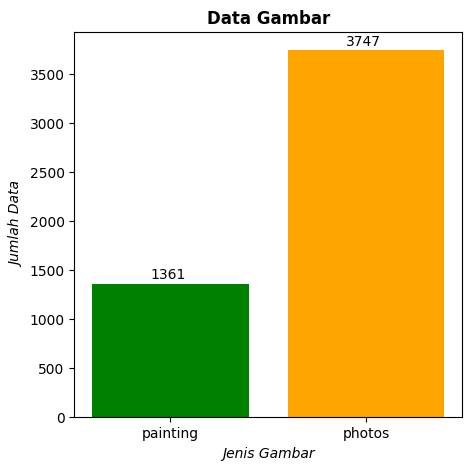

In [4]:
plt.figure(figsize = (5,5))
plt.title('Data Gambar', fontweight='bold')
plt.xlabel('Jenis Gambar', fontstyle='oblique')
plt.ylabel('Jumlah Data', fontstyle='oblique')
plt.bar(dataset_info.keys(),
        [len(files) for files in dataset_info.values()],
        color=['green', 'orange'])

for index, value in enumerate([len(files) for files in dataset_info.values()]):
    plt.text(index - .1, value + 50, str(value))

plt.show()

### Menampilkan Sample Gambar

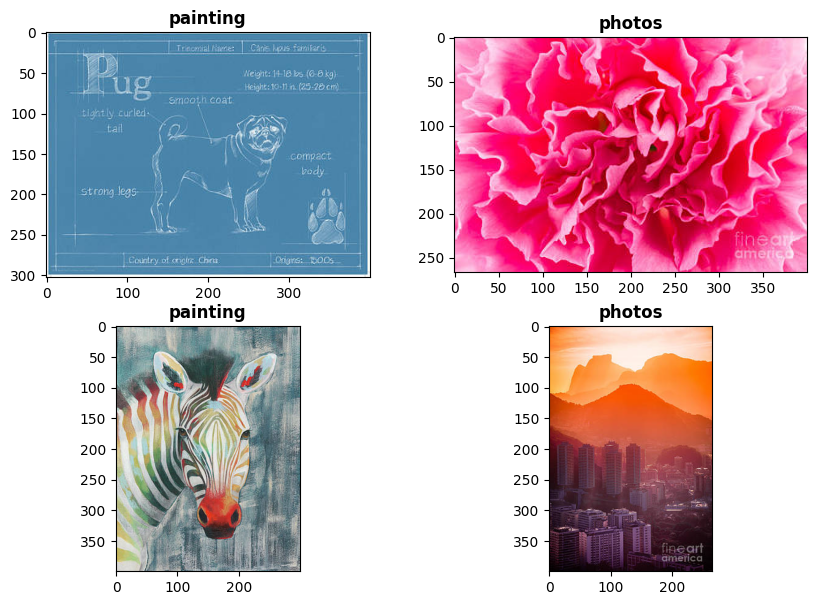

In [5]:
fig = plt.figure(figsize = (10, 7))

image_position = 0

for j in range(2):
    for index, folder in enumerate(dataset_info.keys()):
        image_position += 1
        fig.add_subplot(2, 2, image_position)
        plt.title(folder, fontweight='bold')
        plt.imshow(img.imread(os.path.join(dataset, folder, dataset_info[folder][random.randint(0,1000)])))

### Split Dataset
##### Data Training 80%, Data Validation 15%, dan Data Testing 5%

In [6]:
split_path = r'Split_Raw_Data'

train_path = os.path.join(split_path, 'train')
val_path = os.path.join(split_path, 'val')
test_path = os.path.join(split_path, 'test')

file_train = {}; file_val = {}; file_test = {}

# Data Training
for label in os.listdir(train_path):
    file_train[label] = [file for file in os.listdir(
        os.path.join(train_path, label))]

# Data Validation
for label in os.listdir(val_path):
    file_val[label] = [file for file in os.listdir(
        os.path.join(val_path, label))]

# Data Testing
for label in os.listdir(test_path):
    file_test[label] = [file for file in os.listdir(
        os.path.join(test_path, label))]

In [7]:
print(
    f'Jumlah Data Training\t\t: {sum([len(files) for files in file_train.values()])}',
    f'\nJumlah Data Validation\t\t: {sum([len(files) for files in file_val.values()])}',
    f'\nJumlah Data Testing\t\t: {sum([len(files) for files in file_test.values()])}'
)

Jumlah Data Training		: 4086 
Jumlah Data Validation		: 765 
Jumlah Data Testing		: 255


### Data Augmentation

##### - Data Training

In [24]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 0.45
)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (150,150),
    batch_size = 2,
    shuffle = True,
    class_mode = 'binary'
)

Found 4086 images belonging to 2 classes.


##### - Data Validation

In [25]:
val_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 0.45
)

val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size = (150,150),
    batch_size = 2,
    shuffle = True,
    class_mode = 'binary'
)

Found 765 images belonging to 2 classes.


##### - Data Testing

In [10]:
test_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 0.45
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size = (150,150),
    batch_size = 2,
    shuffle = True,
    class_mode = 'binary'
)

Found 255 images belonging to 2 classes.


### Model Arsitektur

In [26]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation ='relu', input_shape=[150, 150, 3]), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 350464)            0         
                                                                 
 dense (Dense)               (None, 1)                 350465    
                                                                 
Total params: 352,257
Trainable params: 352,257
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Latih Model

In [38]:
hasil = model.fit(train_generator, epochs=10, steps_per_epoch=350, validation_data=val_generator)

Epoch 1/10
350/350 [==============================] - 25s 70ms/step - loss: 0.0949 - accuracy: 0.9686 - val_loss: 0.4316 - val_accuracy: 0.8627
Epoch 2/10
350/350 [==============================] - 23s 64ms/step - loss: 0.1130 - accuracy: 0.9571 - val_loss: 0.3995 - val_accuracy: 0.8837
Epoch 3/10
350/350 [==============================] - 23s 66ms/step - loss: 0.0893 - accuracy: 0.9714 - val_loss: 0.3796 - val_accuracy: 0.8928
Epoch 4/10
350/350 [==============================] - 23s 64ms/step - loss: 0.1105 - accuracy: 0.9557 - val_loss: 0.6183 - val_accuracy: 0.8275
Epoch 5/10
350/350 [==============================] - 23s 65ms/step - loss: 0.1107 - accuracy: 0.9571 - val_loss: 0.3840 - val_accuracy: 0.9085
Epoch 6/10
350/350 [==============================] - 23s 65ms/step - loss: 0.0729 - accuracy: 0.9814 - val_loss: 0.4565 - val_accuracy: 0.8993
Epoch 7/10
350/350 [==============================] - 23s 65ms/step - loss: 0.0629 - accuracy: 0.9786 - val_loss: 0.4116 - val_accuracy:

### Visualisasi Hasil Accuracy

In [39]:
accuracy_train = hasil.history['accuracy']
val_accuracy = hasil.history['val_accuracy']

x = range(len(accuracy_train))

Text(0.5, 1.0, 'Accuracy')

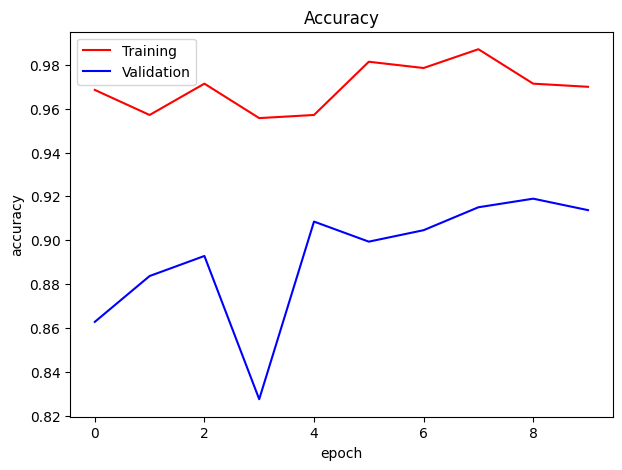

In [40]:
plt.figure(1, figsize=(7, 5))
plt.plot(x, accuracy_train, color='red', label='Training')
plt.plot(x, val_accuracy, color='blue', label='Validation')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy')

### Evaluasi Data Testing

In [41]:
evaluasi = model.evaluate(test_generator)

128/128 [==============================] - 3s 21ms/step - loss: 0.1171 - accuracy: 0.9765


In [42]:
result = model.predict(test_generator)
print(result)

128/128 [==============================] - 3s 21ms/step
[[3.37799080e-02]
 [1.70780753e-04]
 [9.01894793e-02]
 [9.99999940e-01]
 [9.99409974e-01]
 [4.23015468e-02]
 [2.61611131e-05]
 [7.08233705e-03]
 [9.99975502e-01]
 [1.64918473e-03]
 [1.00000000e+00]
 [9.99175787e-01]
 [9.97852027e-01]
 [1.45547446e-02]
 [7.01651633e-01]
 [9.99838591e-01]
 [9.72614229e-01]
 [2.58099497e-03]
 [1.00000000e+00]
 [2.97231949e-03]
 [9.84004974e-01]
 [9.98784363e-01]
 [9.99999940e-01]
 [1.94765162e-02]
 [3.06872159e-01]
 [9.20073330e-01]
 [1.12019297e-04]
 [5.49902081e-01]
 [1.00000000e+00]
 [9.96368289e-01]
 [9.99840796e-01]
 [9.99999821e-01]
 [9.93047059e-01]
 [1.08313589e-08]
 [5.83043573e-07]
 [9.99999940e-01]
 [2.02686563e-01]
 [9.87230182e-01]
 [9.96591687e-01]
 [9.99657094e-01]
 [3.15623032e-03]
 [4.01238119e-03]
 [9.92012799e-01]
 [4.32640091e-02]
 [8.77992570e-01]
 [4.66204993e-02]
 [6.80319545e-06]
 [1.34384232e-02]
 [1.22356597e-10]
 [9.99333799e-01]
 [1.32101941e-05]
 [1.00000000e+00]
 [7.7390

In [ ]:
model.save('Model.h5')

### Prediksi dari Data Testing

In [ ]:
class_names = ['painting', 'photos']

image, label = next(iter(test_generator))

plt.figure(figsize=(10, 7))
for i in range(2):
    TrueLabel = class_names[np.argmax(label[i])]
    plt.subplot(2, 2, i+1)
    plt.axis('off')
    y_pred = np.argmax(model.predict(image[i][None,...], verbose=0))
    plt.imshow(tf.squeeze(image[i]))
    plt.title(f'Label : {TrueLabel}, Prediksi : {class_names[y_pred]}')